# Installation

In [1]:
!python3 setup.py install

running install
running build
running build_py
copying circonusapi/config.py -> build/lib/circonusapi
copying circonusapi/circonusdata.py -> build/lib/circonusapi
running install_lib
copying build/lib/circonusapi/config.py -> /opt/conda/lib/python3.6/site-packages/circonusapi
copying build/lib/circonusapi/circonusdata.clean.py -> /opt/conda/lib/python3.6/site-packages/circonusapi
copying build/lib/circonusapi/circonusdata.py -> /opt/conda/lib/python3.6/site-packages/circonusapi
copying build/lib/circonusapi/circonusapi.py -> /opt/conda/lib/python3.6/site-packages/circonusapi
byte-compiling /opt/conda/lib/python3.6/site-packages/circonusapi/config.py to config.cpython-36.pyc
byte-compiling /opt/conda/lib/python3.6/site-packages/circonusapi/circonusdata.clean.py to circonusdata.clean.cpython-36.pyc
byte-compiling /opt/conda/lib/python3.6/site-packages/circonusapi/circonusdata.py to circonusdata.cpython-36.pyc
byte-compiling /opt/conda/lib/python3.6/site-packages/circonusapi/circonusapi.p

# Importing Credentials

In [17]:
import json, os

with open(os.getenv("HOME") + '/host/home/.circonusrc.json', 'r') as fh:
    config=json.loads(fh.read())
    
token = config["demo"]

# Creating API Object

In [3]:
from circonusapi import circonusdata
circ = circonusdata.CirconusData(token)

In [5]:
from datetime import datetime

# CAQL Hello World

In [6]:
circ.caql("""

    1 + 2

""", datetime(2020, 1, 1), 60, 10)

{'version': 'DF4',
 'head': {'count': 10, 'start': 1577836800, 'period': 60},
 'meta': [{'kind': 'numeric', 'label': 'CAQL|op:sum()'}],
 'data': [[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]]}

# CAQL Search

In [29]:
from datetime import datetime
df = circ.caqldf("""

    find("duration", limit=10) | label("%tv{__check_target}")

""", datetime(2020, 1, 1), 60, 60 * 24)
df.head()

,xkcd.com,xkcd.com,151.101.64.67,151.101.192.67,151.101.0.67,151.101.64.67,151.101.0.67,151.101.192.67,151.101.128.67,10.8.20.116,k8sdemo2
2020-01-01 00:00:00,3.0,3.0,3.0,17.0,NaN,13.0,NaN,2.0,3.0,22.0,49.0
2020-01-01 00:01:00,3.0,3.0,3.0,11.0,NaN,12.0,NaN,2.0,3.0,22.0,55.0
2020-01-01 00:02:00,3.0,3.0,3.0,11.0,NaN,12.0,NaN,2.0,3.0,20.0,61.0
2020-01-01 00:03:00,3.0,3.0,3.0,13.0,NaN,12.0,NaN,2.0,3.0,21.0,48.0
2020-01-01 00:04:00,3.0,3.0,3.0,12.0,NaN,11.0,NaN,2.0,3.0,20.0,44.0


# Plot Results

In [30]:
from matplotlib import pyplot as plt

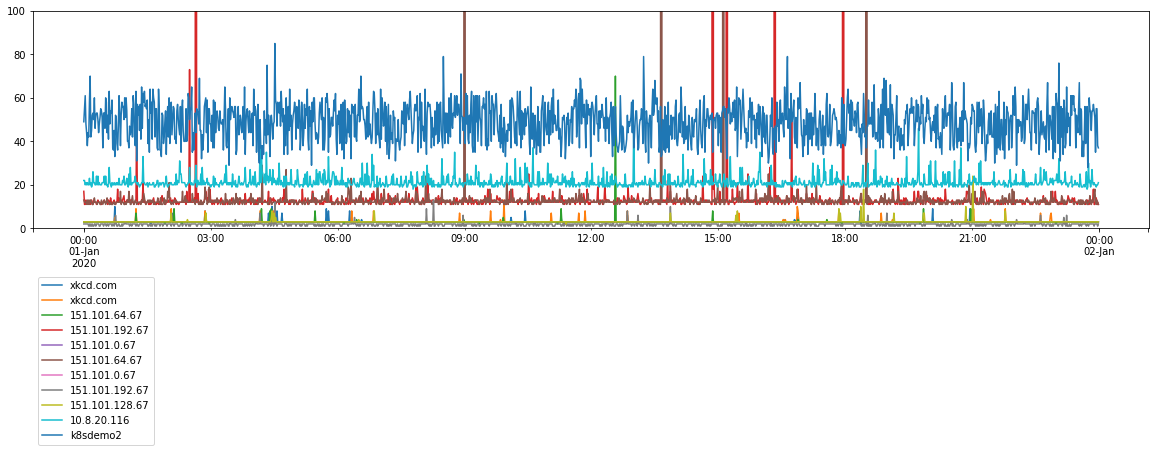

In [31]:
plt.figure(figsize=(20,4))
ax = plt.subplot(1,1,1)
df.plot(ax=ax)
plt.ylim(0,100)
plt.legend(loc="upper left", bbox_to_anchor=(0,-0.2))